In [0]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
print(os.listdir('/content/drive/My Drive/Colab Notebooks/Divorce'))

['divorce.csv', 'divorce.xlsx', 'divorce.rar', '~$divorce.xlsx']


In [29]:
# Nossos dados foram obtidos através do portal UCI: Machine Learning Repository:
# https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set 
# Contêm 54 perguntas (features) para avaliar casamento.

# Foram respondidas por dois groupos:
#   1) Divorciados (coluna "Class" igual a 1)
#   2) Casados (coluna "Class" igual a 0)

# A ideia é buscar as seguintes informações:
#    1) Quais as perguntas chaves para determinar se um relacionamento está fadado ao fracasso
#    2) Prever, com estatisticas simples, se um casal é divorciado ou não
#    3) Responder o que representa as respostas 0,1,2,3 e 4.


# Como são os dados?
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Divorce/divorce.csv',sep=';')
df.head(3)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1


In [30]:
# Entendendo os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
Atr1     170 non-null int64
Atr2     170 non-null int64
Atr3     170 non-null int64
Atr4     170 non-null int64
Atr5     170 non-null int64
Atr6     170 non-null int64
Atr7     170 non-null int64
Atr8     170 non-null int64
Atr9     170 non-null int64
Atr10    170 non-null int64
Atr11    170 non-null int64
Atr12    170 non-null int64
Atr13    170 non-null int64
Atr14    170 non-null int64
Atr15    170 non-null int64
Atr16    170 non-null int64
Atr17    170 non-null int64
Atr18    170 non-null int64
Atr19    170 non-null int64
Atr20    170 non-null int64
Atr21    170 non-null int64
Atr22    170 non-null int64
Atr23    170 non-null int64
Atr24    170 non-null int64
Atr25    170 non-null int64
Atr26    170 non-null int64
Atr27    170 non-null int64
Atr28    170 non-null int64
Atr29    170 non-null int64
Atr30    170 non-null int64
Atr31    170 non-null int64
Atr32    170 non-null int64

In [31]:
# Existem dados nulos?
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1,keys=['# NULL'])
missing_data

,# NULL
Class,0
Atr14,0
Atr25,0
Atr24,0
Atr23,0
Atr22,0
Atr21,0
Atr20,0
Atr19,0
Atr18,0


In [32]:
# Como estão distribuidos os dados?
round(df.describe(), 4)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000
mean,1.7765,1.6529,1.7647,1.4824,1.5412,0.7471,0.4941,1.4529,1.4588,1.5765,1.6882,1.6529,1.8353,1.5706,1.5706,1.4765,1.6529,1.5176,1.6412,1.4588,1.3882,1.2471,1.4118,1.5118,1.6294,1.4882,1.4000,1.3059,1.4941,1.4941,2.1235,2.0588,1.8059,1.9000,1.6706,1.6059,2.0882,1.8588,2.0882,1.8706,1.9941,2.1588,2.7059,1.9412,2.4588,2.5529,2.2706,2.7412,2.3824,2.4294,2.4765,2.5176,2.2412,2.0118,0.4941
std,1.6273,1.4687,1.4154,1.5043,1.6322,0.9040,0.8987,1.5464,1.5580,1.4215,1.6471,1.4687,1.4784,1.5028,1.5067,1.5042,1.6145,1.5660,1.6410,1.5542,1.4521,1.4465,1.6120,1.5044,1.5301,1.5004,1.4571,1.4678,1.5923,1.5044,1.6470,1.6234,1.7852,1.6305,1.8422,1.7984,1.7161,1.7348,1.7195,1.7960,1.7218,1.5740,1.3484,1.6843,1.4999,1.3718,1.5868,1.1373,1.5116,1.4051,1.2602,1.4765,1.5056,1.6676,0.5014
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,0.0000,0.0000
50%,2.0000,2.0000,2.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,2.0000,1.0000,1.5000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.5000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,0.5000,0.0000,2.0000,1.0000,2.0000,1.5000,2.0000,2.0000,3.0000,2.0000,3.0000,3.0000,2.0000,3.0000,3.0000,2.0000,3.0000,3.0000,2.0000,2.0000,0.0000
75%,3.0000,3.0000,3.0000,3.0000,3.0000,1.0000,1.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,1.0000
max,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,1.0000


In [33]:
# Identificando as estatísticas básicas, de cada feature, agrupados por Casados/Divorciados.
round(df[df.columns.values].groupby(['Class']).describe(), 4)

Atr1                                 ...   Atr54                         
      count    mean     std  min  25%  50%  ...     std  min  25%  50%  75%  max
Class                                       ...                                 
0      86.0  0.3953  0.8981  0.0  0.0  0.0  ...  0.8713  0.0  0.0  0.0  1.0  4.0
1      84.0  3.1905  0.7521  0.0  3.0  3.0  ...  1.0952  0.0  3.0  4.0  4.0  4.0

[2 rows x 432 columns]

In [34]:
# Apresentando os dados apenas para o grupo de Divorciados
round(df[df.Class == 1].describe(), 4)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.0000,84.000,84.0000,84.0000,84.0000,84.0000,84.0
mean,3.1905,2.8690,2.9167,2.7262,3.0119,1.1310,0.9881,2.8095,2.8929,2.7738,3.2143,2.9405,3.0952,2.8810,2.9405,2.8214,3.1667,2.9762,3.1786,2.8810,2.6548,2.4524,2.7738,2.7857,2.9524,2.8095,2.6786,2.5595,2.9286,2.8214,3.4405,3.4167,3.3571,3.2738,3.2738,3.2143,3.5833,3.4048,3.6429,3.5714,3.5476,3.3333,3.4762,3.3810,3.2857,3.1667,3.3214,3.4524,3.5119,3.500,3.3571,3.4881,3.3214,3.3690,1.0
std,0.7521,0.9155,0.7478,0.9229,0.9755,0.9022,1.0698,1.0117,0.8784,0.8829,0.8370,0.8552,0.8590,0.9494,0.7968,0.9073,0.7418,0.8062,0.7786,0.8972,0.9755,1.1344,1.2059,1.0188,1.0049,0.9629,0.9589,1.0794,0.9791,0.9463,1.0102,0.8245,1.0937,1.0221,1.2644,1.1727,0.8245,0.9832,0.7548,0.7328,0.8418,0.8962,0.9246,0.8904,1.0479,1.0958,1.1211,0.7182,0.7838,0.814,0.8452,0.8711,0.9205,1.0952,0.0
min,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,0.0000,1.0
25%,3.0000,2.0000,3.0000,2.0000,3.0000,0.0000,0.0000,2.0000,3.0000,2.0000,3.0000,2.7500,3.0000,2.0000,3.0000,2.0000,3.0000,3.0000,3.0000,2.0000,2.0000,2.0000,3.0000,2.0000,3.0000,2.0000,2.0000,2.0000,3.0000,2.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,4.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.000,3.0000,3.0000,3.0000,3.0000,1.0
50%,3.0000,3.0000,3.0000,3.0000,3.0000,1.0000,1.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.000,4.0000,4.0000,4.0000,4.0000,1.0
75%,4.0000,4.0000,3.0000,3.0000,4.0000,2.0000,1.0000,3.2500,3.0000,3.0000,4.0000,3.2500,4.0000,4.0000,3.0000,3.0000,4.0000,3.2500,4.0000,4.0000,3.0000,3.0000,4.0000,3.2500,4.0000,3.0000,3.0000,3.0000,4.0000,3.2500,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.000,4.0000,4.0000,4.0000,4.0000,1.0
max,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.000,4.0000,4.0000,4.0000,4.0000,1.0


In [35]:
# Apresentando os dados apenas para o grupo de Casados
round(df[df.Class == 0].describe(), 4)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0000,86.0
mean,0.3953,0.4651,0.6395,0.2674,0.1047,0.3721,0.0116,0.1279,0.0581,0.4070,0.1977,0.3953,0.6047,0.2907,0.2326,0.1628,0.1744,0.0930,0.1395,0.0698,0.1512,0.0698,0.0814,0.2674,0.3372,0.1977,0.1512,0.0814,0.0930,0.1977,0.8372,0.7326,0.2907,0.5581,0.1047,0.0349,0.6279,0.3488,0.5698,0.2093,0.4767,1.0116,1.9535,0.5349,1.6512,1.9535,1.2442,2.0465,1.2791,1.3837,1.6163,1.5698,1.1860,0.6860,0.0
std,0.8981,0.7623,0.9192,0.8033,0.3766,0.7364,0.1078,0.3999,0.2354,0.6752,0.4006,0.5796,0.7240,0.5056,0.4771,0.4018,0.4114,0.2922,0.3808,0.2562,0.3603,0.2562,0.3503,0.5620,0.4997,0.4006,0.3603,0.2750,0.2922,0.4289,1.0042,0.9873,0.6837,0.7609,0.4067,0.1846,0.9081,0.6091,0.7752,0.4879,0.6983,1.2029,1.2733,0.9036,1.4371,1.3539,1.2736,1.0393,1.2044,1.0194,0.9722,1.3243,1.1833,0.8713,0.0
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,2.0000,0.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,0.0000,0.0
75%,0.0000,1.0000,1.0000,0.0000,0.0000,0.7500,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7500,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,2.0000,3.0000,1.0000,3.0000,3.0000,2.0000,3.0000,2.0000,2.0000,2.0000,3.0000,2.0000,1.0000,0.0
max,4.0000,3.0000,4.0000,4.0000,2.0000,4.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,3.0000,2.0000,2.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,4.0000,4.0000,4.0000,4.0000,3.0000,1.0000,4.0000,3.0000,4.0000,2.0000,3.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,0.0


In [0]:
# Armazenando em df diferentes os casados e divorciados
casados = df.loc[df['Class'] == 0]
divorciados = df.loc[df['Class'] == 1]

In [0]:
# Não é mais preciso a coluna "Class". Vamos removê-la.
casados = casados.drop(['Class'], axis=1)
divorciados = divorciados.drop(['Class'], axis=1)

In [0]:
# Calculando a média das features dos casados e divorciados, e armazenando em váriaveis do tipo Series do pandas.
casados_media = casados.mean()
divorciados_media = divorciados.mean()

In [58]:
# Estatísticas descritivas: casados
casados_media.describe()

count    54.000000
mean      0.550818
std       0.559583
min       0.011628
25%       0.151163
50%       0.343023
75%       0.674419
max       2.046512
dtype: float64

In [59]:
# Estatísticas descritivas: divorciados
divorciados_media.describe()

count    54.000000
mean      3.046517
std       0.494933
min       0.988095
25%       2.833333
50%       3.166667
75%       3.366071
max       3.642857
dtype: float64

In [0]:
# Agora vamos calcular a diferença entre os grupos dos divorciados e casados.
diff = divorciados_media - casados_media

Text(0.5, 1.0, 'P-P Plot')

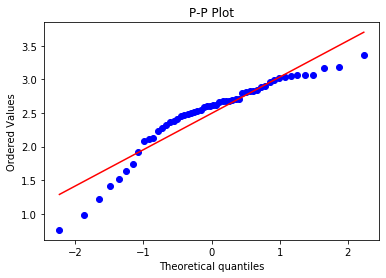

In [62]:
# Mostrando o gráfico P-P Plot dessa diferença
res = stats.probplot(diff, plot= plt)
plt.title('P-P Plot') 

In [65]:
# Representando em valores númericos: Estamos interessados nas features com maiores valores na diferença
res

((array([-2.23362047, -1.86703686, -1.65126333, -1.49286247, -1.36497291,
         -1.25618214, -1.16051715, -1.07443739, -0.99566063, -0.92262351,
         -0.85420428, -0.78956785, -0.72807355, -0.66921719, -0.61259326,
         -0.55786922, -0.50476762, -0.45305319, -0.40252348, -0.35300167,
         -0.30433122, -0.25637157, -0.20899478, -0.16208275, -0.11552493,
         -0.06921631, -0.02305574,  0.02305574,  0.06921631,  0.11552493,
          0.16208275,  0.20899478,  0.25637157,  0.30433122,  0.35300167,
          0.40252348,  0.45305319,  0.50476762,  0.55786922,  0.61259326,
          0.66921719,  0.72807355,  0.78956785,  0.85420428,  0.92262351,
          0.99566063,  1.07443739,  1.16051715,  1.25618214,  1.36497291,
          1.49286247,  1.65126333,  1.86703686,  2.23362047]),
  array([0.75885936, 0.97646733, 1.21317829, 1.40586932, 1.5227021 ,
         1.6345515 , 1.74086379, 1.9183278 , 2.07724252, 2.11627907,
         2.13538206, 2.23283499, 2.27713178, 2.32170543, 2.

In [64]:
# Mostrando os valores da diferença, de cada feature, na ordem decrescente.
diff.sort_values(ascending=False)

Atr40    3.362126
Atr36    3.179402
Atr35    3.169158
Atr39    3.073090
Atr41    3.070875
Atr33    3.066445
Atr38    3.055925
Atr19    3.039037
Atr11    3.016611
Atr17    2.992248
Atr37    2.955426
Atr5     2.907254
Atr18    2.883167
Atr44    2.846069
Atr29    2.835548
Atr9     2.834718
Atr20    2.811185
Atr1     2.795127
Atr34    2.715670
Atr15    2.707918
Atr23    2.692414
Atr32    2.684109
Atr54    2.683001
Atr8     2.681617
Atr16    2.658638
Atr30    2.623754
Atr25    2.615172
Atr26    2.611849
Atr31    2.603267
Atr14    2.590255
Atr12    2.545127
Atr27    2.527409
Atr24    2.518272
Atr21    2.503599
Atr13    2.490587
Atr28    2.478128
Atr4     2.458749
Atr2     2.403931
Atr22    2.382614
Atr10    2.366833
Atr42    2.321705
Atr3     2.277132
Atr49    2.232835
Atr53    2.135382
Atr50    2.116279
Atr47    2.077243
Atr52    1.918328
Atr51    1.740864
Atr45    1.634551
Atr43    1.522702
Atr48    1.405869
Atr46    1.213178
Atr7     0.976467
Atr6     0.758859
dtype: float64

Text(0.5, 0, 'Media')

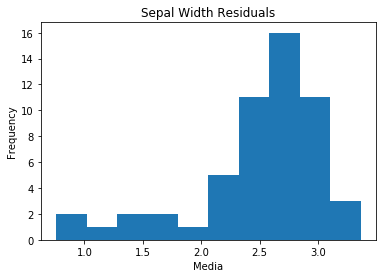

In [0]:
# Vamos plotar o hist dessa diferença
diff.plot(kind= "hist", title= "Sepal Width Residuals")
plt.xlabel("Media")

In [67]:
# Filtrando as perguntas mais relevantes para o grupo de divorciados.

#40. We're just starting a discussion before I know what's going on.
#36. I can be humiliating when we discussions.
#35. I can insult my spouse during our discussions.
#39. Our discussions often occur suddenly.
#41. When I talk to my spouse about something, my calm suddenly breaks.
#33. I can use negative statements about my spouse's personality during our discussions.

diff[diff.values > 3.06].sort_values(ascending=False)

# Baseado nas perguntas acima e que são divorciados é possível afirmar que:
# 0 (discordo totalmente); 1 (discordo); 2 (indiferente/neutro); 3 (concordo); 4 (concordo totalmente)

Atr40    3.362126
Atr36    3.179402
Atr35    3.169158
Atr39    3.073090
Atr41    3.070875
Atr33    3.066445
dtype: float64

In [68]:
# Filtrando as perguntas não conclusivas

#6. We don't have time at home as partners.
#7. We are like two strangers who share the same environment at home rather than family.
#46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
#48. I feel right in our discussions.
#43. I mostly stay silent to calm the environment a little bit.
#45. I'd rather stay silent than discuss with my spouse.
#51. I'm not the one who's wrong about problems at home.
#52. I wouldn't hesitate to tell my spouse about her/his inadequacy.

diff[diff.values < 2].sort_values()

Atr6     0.758859
Atr7     0.976467
Atr46    1.213178
Atr48    1.405869
Atr43    1.522702
Atr45    1.634551
Atr51    1.740864
Atr52    1.918328
dtype: float64

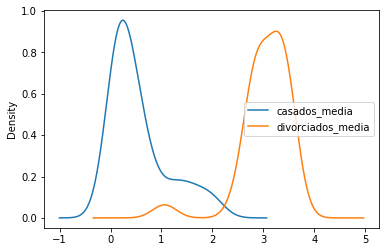

In [76]:
# Como está representado o gráfico KDE?
df2 = pd.DataFrame({'casados_media': casados_media, 'divorciados_media': divorciados_media})
ax = df2.plot.kde()

In [74]:
# Mostrando os dados, da diferença de cada feature, para melhor entendimento
df2

,casados_media,divorciados_media
Atr1,0.395349,3.190476
Atr2,0.465116,2.869048
Atr3,0.639535,2.916667
Atr4,0.267442,2.726190
Atr5,0.104651,3.011905
Atr6,0.372093,1.130952
Atr7,0.011628,0.988095
Atr8,0.127907,2.809524
Atr9,0.058140,2.892857
Atr10,0.406977,2.773810


In [0]:
# Estatísticas descritivas
df2.describe()

,casados_media,divorciados_media
count,54.000000,54.000000
mean,0.550818,3.046517
std,0.559583,0.494933
min,0.011628,0.988095
25%,0.151163,2.833333
50%,0.343023,3.166667
75%,0.674419,3.366071
max,2.046512,3.642857


In [0]:
# Calculando os valores que irão representar as respostas das features, de cada grupo. A ideia é prever se o casal é divorciado ou não.
value_divorciado = df2.describe()['divorciados_media']['mean'] - df2.describe()['divorciados_media']['std']
value_casado = df2.describe()['casados_media']['mean'] + df2.describe()['casados_media']['std']

In [79]:
# Se uma resposta for >= o valor abaixo é muito provável que sejam divorciados
value_divorciado

2.5515842101560438

In [81]:
# Se uma resposta for <= o valor abaixo é muito provável que sejas casados
value_casado

1.110401628722797

In [0]:
# Criando uma função para prever se são casados ou divorciados
def getProb(valor):
  if valor >= value_divorciado:
    return 1
  elif valor <= value_casado:
    return 0
  else:
    return -1

In [196]:
compare = df.sample(7)

taxa = 0

for i in range(0,len(compare)):
  # taxa de acerto será diferente para cada feature escolhida. 
  #     As perguntas mais relevantes terão acerto de 100%. 
  #     As não conclusivas com as menores taxas.
  #     As demais perguntas irão variar bastante a taxa de acerto, mas sempre com boa taxa de acerto.
  # Have fun!
  resposta = getProb(compare['Atr3'].values[i])
  if resposta == 1:
    print("Imagino que são divorciados. Será que é?")
    if compare['Class'].values[i] == 1:
      print("    OK, acertamos!")
      taxa+=1
    else:
      print("    Oops, my bad, são casados!")
  elif resposta == 0:
    print("Penso que sejam casados, vamos verificar?")
    if compare['Class'].values[i] == 0:
      print("    São casados sim!")
      taxa+=1
    else:
      print("    Oops, my bad, são divorciados!")
  else:
    print("Não vamos conseguir prever, baseado na resposta, se eles são casados ou não!") 

print("")
print("Com apenas estatísticas básicas conseguimos uma taxa de acerto de: " + str(int((taxa/len(compare))*100)) + "%")
print("")

compare

Penso que sejam casados, vamos verificar?
    São casados sim!
Imagino que são divorciados. Será que é?
    OK, acertamos!
Penso que sejam casados, vamos verificar?
    São casados sim!
Imagino que são divorciados. Será que é?
    OK, acertamos!
Não vamos conseguir prever, baseado na resposta, se eles são casados ou não!
Imagino que são divorciados. Será que é?
    Oops, my bad, são casados!
Imagino que são divorciados. Será que é?
    OK, acertamos!

Com apenas estatísticas básicas conseguimos uma taxa de acerto de: 71%



,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
95,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2,0,2,2,2,2,2,2,2,0
17,4,4,4,3,4,0,0,4,4,3,4,4,4,4,4,3,4,4,4,4,4,3,4,4,4,4,4,3,4,4,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,4,3,4,3,4,1
116,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,2,4,0,4,3,1,1,2,2,2,1,0,0,0
51,3,3,3,2,3,1,1,3,3,2,3,3,3,3,3,2,3,3,3,3,3,2,3,3,3,3,3,2,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,1
52,4,3,2,3,4,1,0,3,2,3,4,3,4,3,2,3,4,3,4,3,2,3,4,3,4,3,2,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,4,3,4,3,4,1
108,0,0,3,0,0,1,0,0,0,0,0,2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,3,3,2,2,0,0,0,0
62,3,2,3,2,3,2,1,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1
